<a href="https://colab.research.google.com/github/Charanpoojary/Project-14-EV-Market-Segmentation/blob/main/Evmarketdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the libraries needed for the Operation
import pandas as pd   
import numpy as np 
%pip install plotly==5.8.0
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sb
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading teh file path
file_path = '/content/drive/MyDrive/Datasets/evmarketdata.csv'
df=pd.read_csv(file_path)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df['inr(10e3)'] = df['PriceEuro']*0.08320

In [ ]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [ ]:
df.head()   # returns the top 5 rows of the dataset

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [ ]:
df.shape      # returns the rows and columnns of the dataset

(103, 15)

In [ ]:
df.info()      # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [ ]:
df.describe()    # returns the information about numerical columns

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,444.2718,0.7476,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,203.9493,0.4365,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,170.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,260.0000,0.5000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,440.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,555.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,940.0000,1.0000,7.0000,215000.0000,17888.0000


In [ ]:
df.isnull().sum()   # checking for null values

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [ ]:
# there is no null values in the dataset

# EXPLORATORY DATA ANALYSIS

In [ ]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
8,Tesla,Model 3 Standard Range Plus,5.6000,225,310,153,650,1,RWD,Type 2 CCS,Sedan,D,5,46380,3858.8160
13,BMW,i4,4.0000,200,450,178,650,1,RWD,Type 2 CCS,Sedan,D,5,65000,5408.0000
21,Tesla,Model Y Long Range Dual Motor,5.1000,217,425,171,930,1,AWD,Type 2 CCS,SUV,D,7,58620,4877.1840
24,Tesla,Model 3 Long Range Performance,3.4000,261,435,167,910,1,AWD,Type 2 CCS,Sedan,D,5,61480,5115.1360
28,BMW,i3 120 Ah,7.3000,150,235,161,270,0,RWD,Type 2 CCS,Hatchback,B,4,38017,3163.0144
33,Tesla,Cybertruck Tri Motor,3.0000,210,750,267,710,1,AWD,Type 2 CCS,Pickup,N,6,75000,6240.0000
40,Tesla,Model S Long Range,3.8000,250,515,184,560,1,AWD,Type 2,Liftback,F,5,79990,6655.1680
51,Tesla,Roadster,2.1000,410,970,206,920,1,AWD,Type 2 CCS,Cabrio,S,4,215000,17888.0000


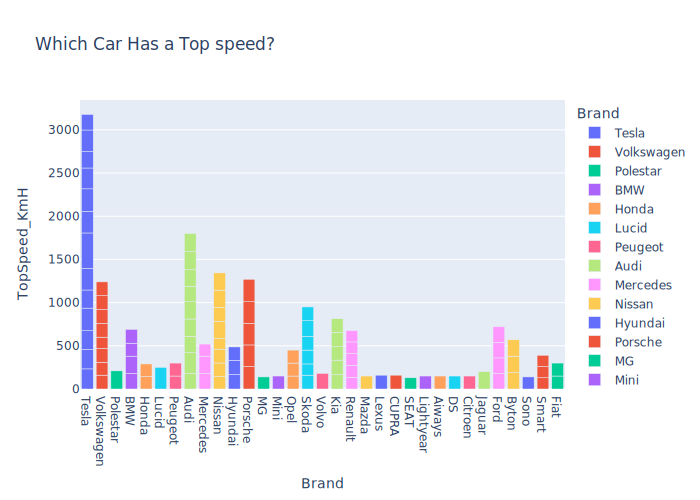

In [ ]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

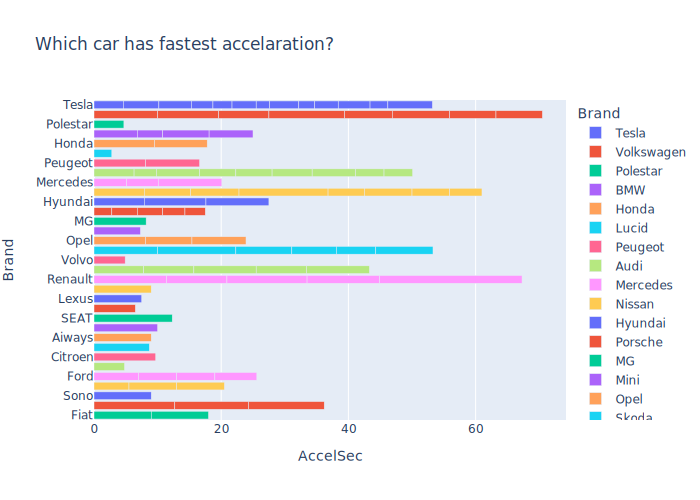

In [ ]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

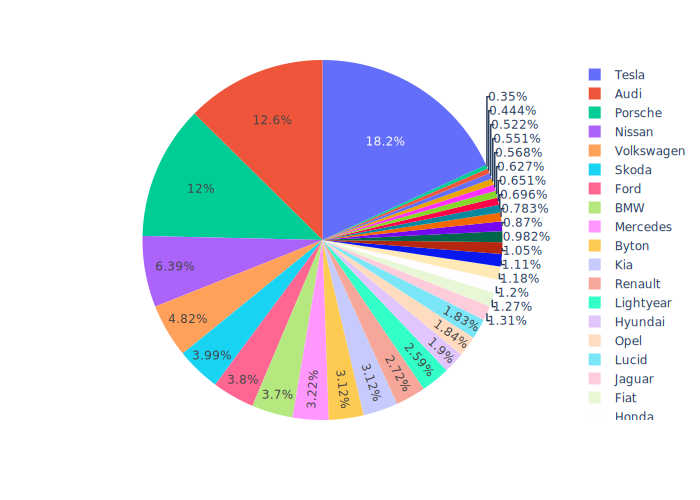

In [ ]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

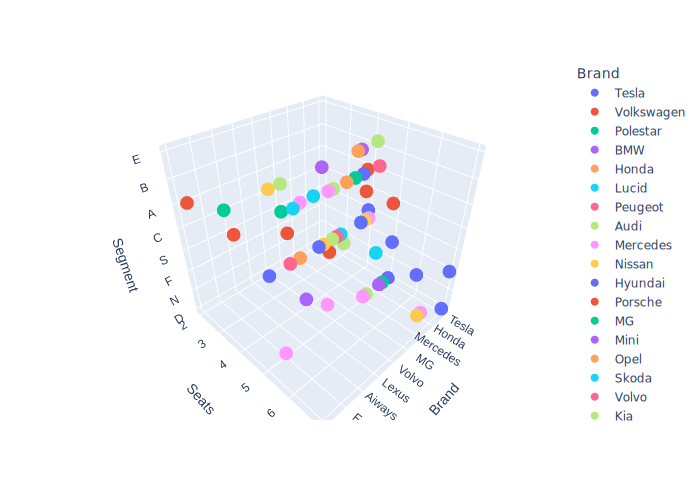

In [ ]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
fig

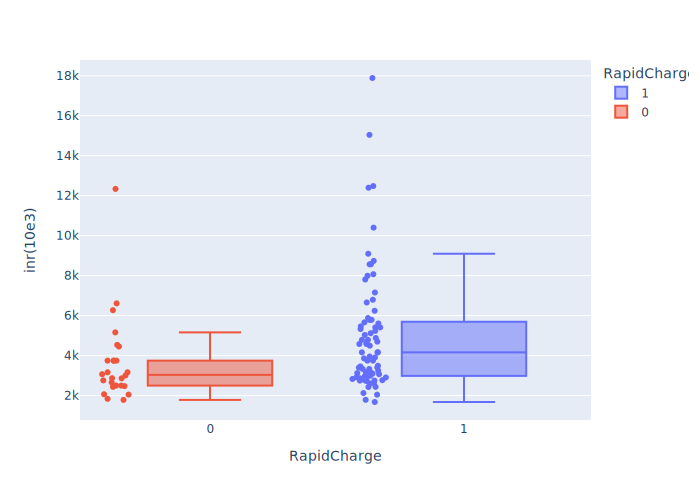

In [ ]:
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)

## Heatmap to show the correlation of the data

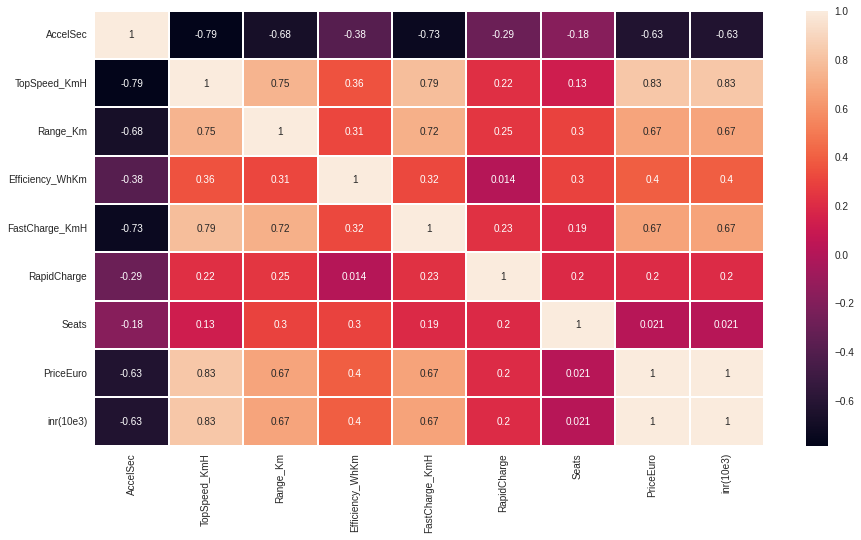

In [ ]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)



## Number of seats in each car

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

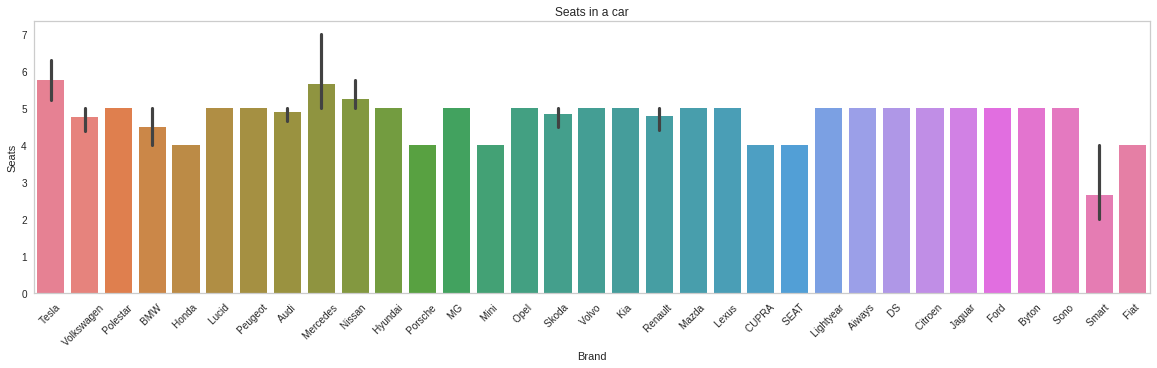

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)



## Car efficiency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

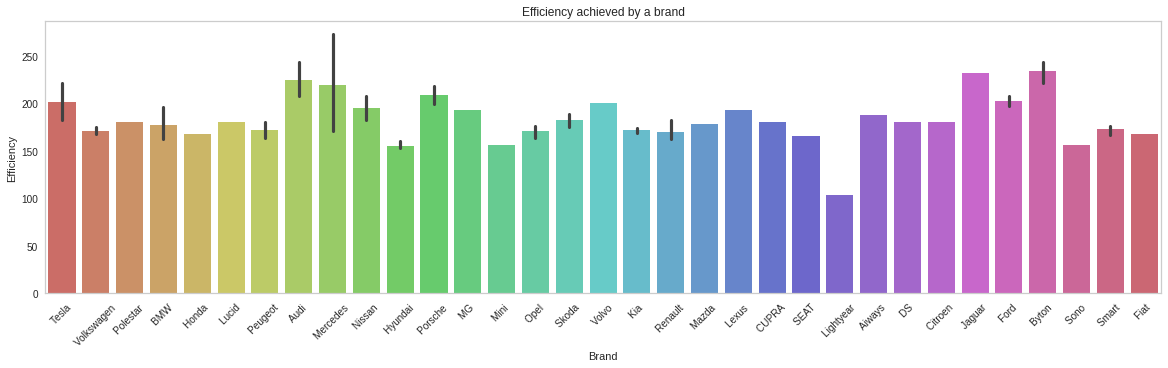

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)



## Price of cars (in INR)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

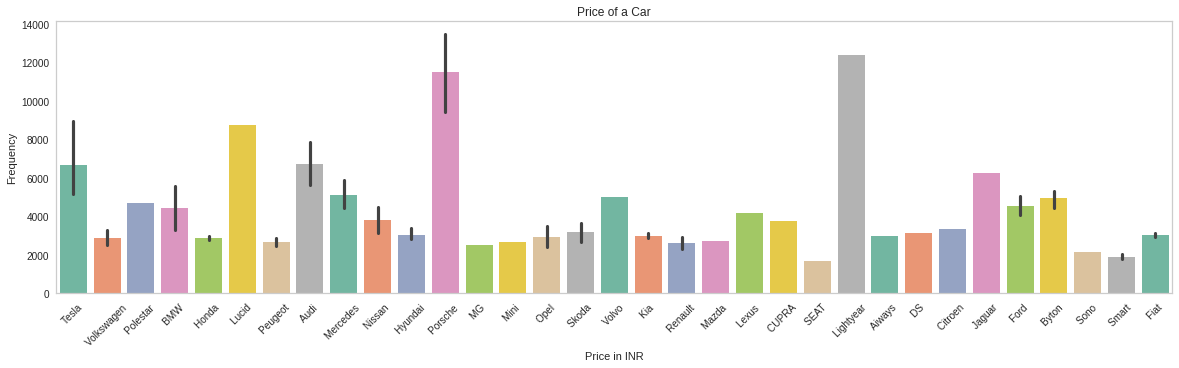

In [ ]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)



## Type of Plug used for charging

In [ ]:
df['PlugType'].value_counts()


Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

Text(0.5, 1.0, 'Plug Type')

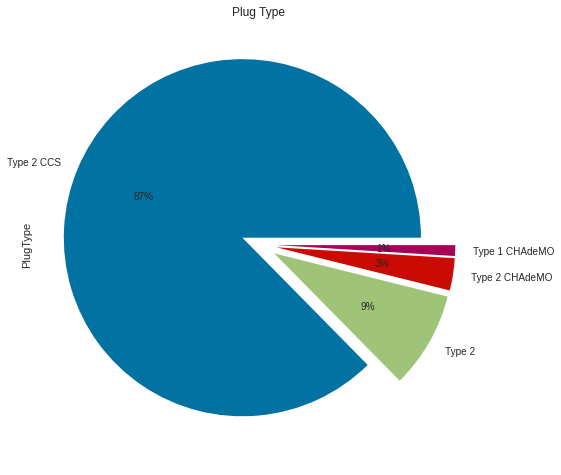

In [ ]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')



## Cars and their body style

In [ ]:
df['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

Text(0.5, 1.0, 'Body Style')

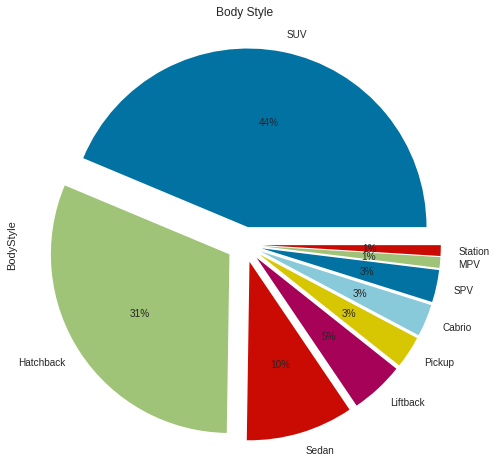

In [ ]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')


## Segment in which the cars fall under

In [ ]:
df['Segment'].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segment')

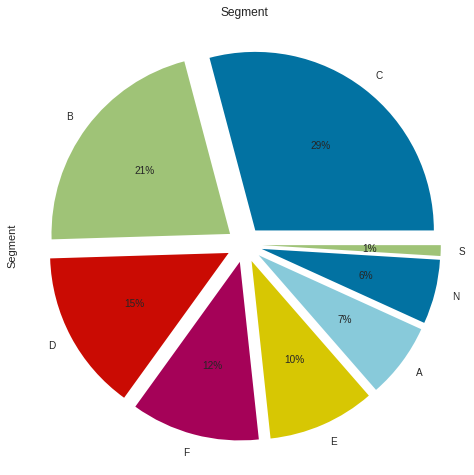

In [ ]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')



## Number of Seats

In [ ]:
df['Seats'].value_counts()

5    71
4    21
7     6
6     3
2     2
Name: Seats, dtype: int64

Text(0.5, 1.0, 'Seats')

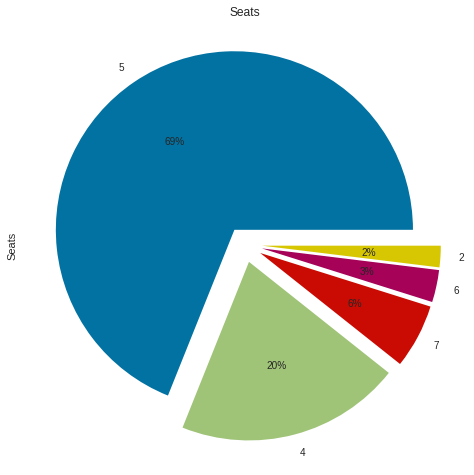

In [ ]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Majority of cars have 5 seats

In [ ]:
df['PowerTrain']

0      2
1      0
2      2
3      0
4      0
      ..
98     1
99     2
100    2
101    2
102    2
Name: PowerTrain, Length: 103, dtype: int64

In [ ]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)

MODEL BUILDING

# Regression

## Putting independent variables as x and dependent variable as y

In [ ]:
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

In [ ]:
x.head()    # independant variables

,AccelSec,Range_Km,TopSpeed_KmH,Efficiency_WhKm,RapidCharge,PowerTrain
0,4.6000,450,233,161,1,2
1,10.0000,270,160,167,0,0
2,4.7000,400,210,181,1,2
3,6.8000,360,180,206,1,0
4,9.5000,170,145,168,1,0


In [ ]:
y.head()    # dependant variable

0    55480
1    30000
2    56440
3    68040
4    32997
Name: PriceEuro, dtype: int64

In [ ]:
x.shape   # independant variable

(103, 6)

In [ ]:
y.shape   # dependant variables

(103,)

In [ ]:
# training and test data

In [ ]:
x_train, x_test, y_train, y_test=train_test_split( x, y, test_size=0.3, random_state=365)   #splitting the data into train and test

In [ ]:
print(x.shape,x_train.shape,x_test.shape)    # checking the size of original and split data

(103, 6) (72, 6) (31, 6)


In [ ]:
# model training  using logistic regression

In [ ]:
model=LinearRegression()    # initiating 

In [ ]:
model.fit(x_train,y_train)     # fitting the data

LinearRegression()

In [ ]:
#accuracy on training data
y_train_pred=model.predict(x_train)
print(y_train_pred)

[ 98741.33729  37910.10965  76068.75937  51052.72795  90257.24765
  35607.34964  22501.51544  45226.07944  41373.93864  65880.95689
  29532.26172  32638.08456  23441.42668  92056.43386  35986.69385
  34318.94373  55646.68241  42032.38144  40111.14699  34644.54978
  60563.78002  37628.2541   36705.07741  95364.3385   39036.83407
 100091.62438  63802.86955  66086.16448  63571.40697  74167.00899
  39861.9726  102525.93641  44961.2987   75789.47796  37628.2541
  35435.00078  81717.16939  41839.62628  91230.96269  60498.33355
  30181.38516  38588.23912 102210.31997  43352.85131 105255.97388
  28791.94335  30673.80702  70371.92345  72710.70353  51819.1177
  54659.46497  59555.77696  29923.74189  19612.3024   52256.96276
  31107.23549  30122.70313  41264.62322  66897.6351   50688.87971
  25042.74159  60785.59385  42053.57413  37547.34678  42135.14871
  69540.25921 105191.84119  31107.23549  17760.60174  95633.22549
  37152.82415  16878.99968]


In [ ]:
# evaluating our model

In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_train, y_train_pred)

In [ ]:
print(r2score)   # printing r2 score

0.6485837471296896


In [ ]:
#accuracy on test data
y_test_pred=model.predict(x_test)   # predicting the actual value
print(y_test_pred)

[ 44149.5792   75994.68555  73072.58763  42192.22578  65563.83173
  49612.47412  69889.88356  67346.98747  41860.63711  52908.41081
  37910.10965  53270.19882 102445.00232 100329.448    64093.04471
  50015.8135   25279.06643  42591.39342  72709.83097  97753.81833
  33709.27495  73310.83489  96423.32373  46361.86488 212990.77133
  58743.7822   38286.24824  54247.62157  45675.29966  75276.58628
  51113.54126]


In [ ]:
# evaluating our model

In [ ]:
# R squarred error 

In [ ]:
r2score=metrics.r2_score(y_test, y_test_pred)

In [ ]:
print(r2score)

0.7877072380232657


In [ ]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']

In [ ]:
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

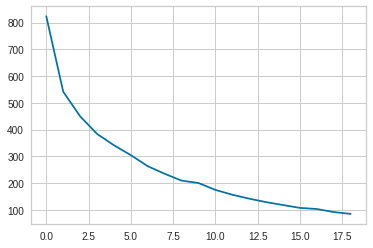

In [ ]:
# elbow method graph ( for selecting the no of clusters )
from sklearn.cluster import KMeans
scores=[]
range_values=range(1,20)
for i in range_values:
  kmean = KMeans(n_clusters=i)
  kmean.fit(x[:,:8])                    # so here we have to select 8 columns(fitting 8 columns)
  scores.append(kmean.inertia_)

plt.plot(scores,'bx-')

In [ ]:
#K-means clustering 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 1 0 0 1 2 1 1 1 0 0 1 1 0 1 1 2 1 1 1 1 0 1 2 2 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 2 1 0 1 1 1 1 2 2 1 0 2 1 1 0 1 1 1 1 2 1 0 0 0 1 2 1 0 1 0 1 0 2 0
 1 1 0 1 0 2 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0]
502.26892867299057
6
[[-0.59008  0.35963  0.93882  0.45823  0.16254  0.44706  0.64453  0.28107
   0.76692]
 [ 0.61009 -0.61097 -0.52853 -0.61922 -0.18625 -0.54154 -0.25163 -0.60365
  -0.68932]
 [-1.17711  1.76599 -0.06574  1.55185  0.40401  1.23958 -0.5328   1.93328
   1.07563]]


In [ ]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({0: 33, 1: 57, 2: 13})

In [ ]:
label=kmeans.labels_

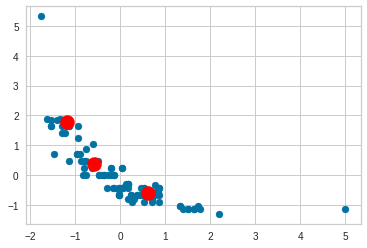

In [ ]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(x)


# Plot the data
plt.scatter(x[:,0], 
            x[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [ ]:
# dimentionality reduction

In [ ]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(x)

In [ ]:
pca_dataframe=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_dataframe    

,pca1,pca2
0,2.4292,-0.5546
1,-2.3225,-0.3454
2,1.5879,0.0089
3,0.2910,-0.0001
4,-2.6027,-0.6265
...,...,...
98,-0.2972,0.4467
99,2.3350,0.6307
100,0.7806,0.4268
101,1.5409,0.6988


In [ ]:
pca_df=pd.concat([pca_dataframe,pd.DataFrame({'cluster':label})],axis=1) # concatinaing ( this step we have done earlier for 7 groups)
pca_df

,pca1,pca2,cluster
0,2.4292,-0.5546,2
1,-2.3225,-0.3454,1
2,1.5879,0.0089,0
3,0.2910,-0.0001,0
4,-2.6027,-0.6265,1
...,...,...,...
98,-0.2972,0.4467,1
99,2.3350,0.6307,0
100,0.7806,0.4268,0
101,1.5409,0.6988,0


In [ ]:
pca_df['cluster'].value_counts()

1    57
0    33
2    13
Name: cluster, dtype: int64

In [ ]:
import seaborn as sns

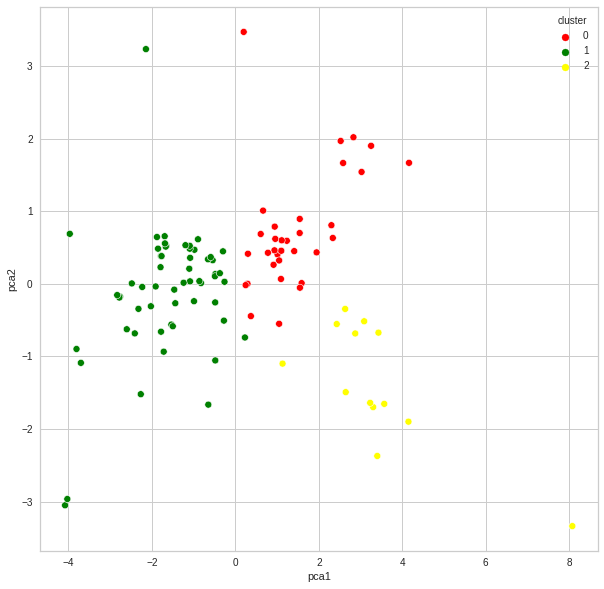

In [ ]:
#ploting the scatterplot for the pca_df data(7 different clusters)
plt.figure(figsize=(10,10))
pca_df_plot=sns.scatterplot(x='pca1',y='pca2',hue="cluster",data=pca_df,palette=['red','green','yellow'])
plt.show()